# Linear Discriminant Analysis

In [1]:
import sklearn.discriminant_analysis
sklearn.discriminant_analysis.__all__


['LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis']

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
dataset = load_iris()

x = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])
y = dataset.target

In [4]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [5]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.__dict__

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': 2,
 'store_covariance': False,
 'tol': 0.0001,
 'covariance_estimator': None}

In [6]:
lda.fit(x, y)
x_lda = lda.transform(x)

Text(0, 0.5, '2nd comp')

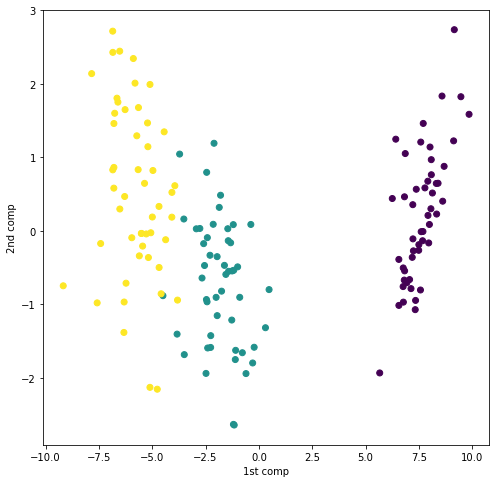

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x_lda[:, 0], x_lda[:, 1], c = y)
plt.xlabel("1st comp")
plt.ylabel("2nd comp")

# KNN (orginal i/p)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [14]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

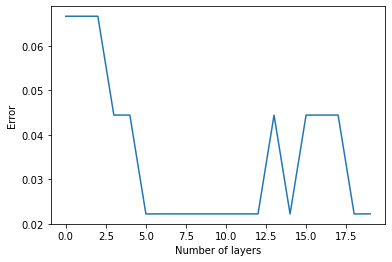

In [15]:
error = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Error")
plt.plot(error)

In [16]:
knn = KNeighborsClassifier(n_neighbors = np.argmin(error))
knn.__dict__
np.argmin(error)

5

In [17]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9555555555555556

In [18]:
pred = knn.predict(x_test)

In [19]:
print(confusion_matrix(y_test, pred))

[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# KNN (lda data)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size=.3)

In [25]:
knn = KNeighborsClassifier()
knn.__dict__

{'n_neighbors': 5,
 'radius': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'p': 2,
 'n_jobs': None,
 'weights': 'uniform'}

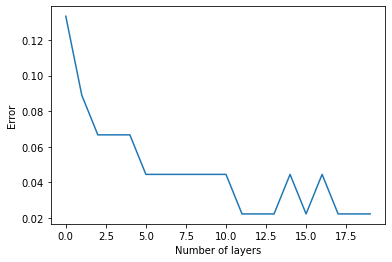

In [26]:
error = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
    
plt.xlabel("Number of layers")
plt.ylabel("Error")
plt.plot(error)

In [27]:
knn = KNeighborsClassifier(n_neighbors = np.argmin(error))
knn.__dict__
np.argmin(error)

11

In [28]:
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.9555555555555556

In [29]:
pred = knn.predict(x_test)

In [30]:
print(confusion_matrix(y_test, pred))

[[12  0  0]
 [ 0 12  2]
 [ 0  0 19]]


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.90      1.00      0.95        19

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.95        45

